### $\color{royalblue}{\text{ Peta vježba iz numeričkih metoda u astronomiji (NMA), datum: 14.11.2024.}} $

### $\color{magenta}{\text{1. NUMERIČKO DIFERENCIRANJE.}} $

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Splajn_interpolacija import spline_interp, spline_der, extrema, spline_integrate

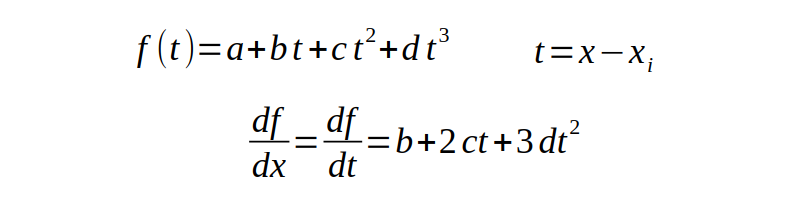

Za uvod, potrebno je odrediti heliocentričnu radijalnu brzinu Saturna u proizvoljnom trenutku korišćenjem linearne interpolacije.

In [19]:
au = 1.495978707e11 # m

t, x, y, z = np.loadtxt('Saturn.dat', skiprows=2, delimiter=',', unpack=True)

t = t[0::10]
x = x[0::10]
y = y[0::10]
z = z[0::10]

r = np.sqrt(x**2+y**2+z**2)

t0 = 9156.543 # random vrijeme

### 1.1. Linearna interpolacija.

[    0.   200.   400.   600.   800.  1000.  1200.  1400.  1600.  1800.
  2000.  2200.  2400.  2600.  2800.  3000.  3200.  3400.  3600.  3800.
  4000.  4200.  4400.  4600.  4800.  5000.  5200.  5400.  5600.  5800.
  6000.  6200.  6400.  6600.  6800.  7000.  7200.  7400.  7600.  7800.
  8000.  8200.  8400.  8600.  8800.  9000.  9200.  9400.  9600.  9800.
 10000. 10200. 10400. 10600.]
t<t0 = [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False False
 False False False False False False] 
 ---------------------------------------------------
t1 = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
 ---------------------------------------------------
t1 = 45
 ----------------

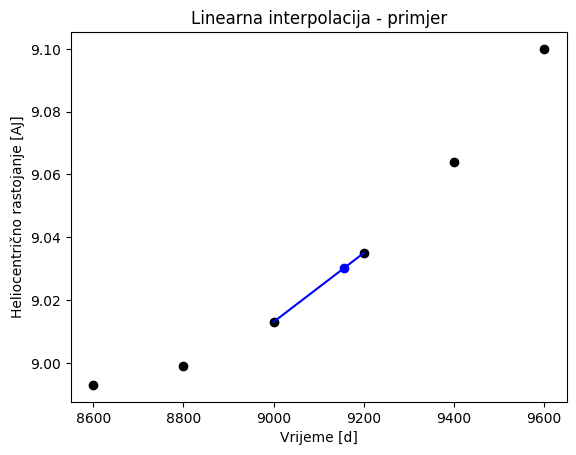

In [21]:
# pronalaženje odgovarajućih indeksa pomocu np.flatnonzero
# najveći koji je manji od t0 (prvi s lijeve strane)
# pravimo logički niz

print(t)
print('t<t0 = {} \n ---------------------------------------------------'.format(t<t0))

# tražimo gdje  nisu nule, tj. gdje je True

t1 = np.flatnonzero(t<t0)

# uzimamo samo posljednji

print('t1 = {}\n ---------------------------------------------------'.format(t1))
t1 = t1[-1]

print('t1 = {}\n ---------------------------------------------------'.format(t1))

# najmanji koji je veći od t0 (prvi s desne strane)

t2 = np.flatnonzero(t>t0)[0]
print('t2 = {}\n ---------------------------------------------------'.format(t2))

r_lin = r[t1]+(t0-t[t1])*(r[t2]-r[t1])/(t[t2]-t[t1])

vr_lin = (r[t2]-r[t1])/(t[t2]-t[t1])
print('vr_lin= {} au/d\n ---------------------------------------------------'.format(vr_lin))
vr_lin = (r[t2]-r[t1])/(t[t2]-t[t1])
print('vr_lin= {} m/s\n ---------------------------------------------------'.format(np.round(vr_lin*au/86400,2)))

fig, ax = plt.subplots()
plt.plot(t[t1-2:t2+3], r[t1-2:t2+3], 'ok')
plt.plot(t0,r_lin,'ob')
plt.plot([t[t1],t[t2]],[r[t1],r[t2]], 'b')

# kompletan plot
# plt.plot(t,r, '.')
# plt.plot(t0,r0,'or',markersize=5)

plt.xlabel('Vrijeme [d]')
plt.ylabel('Heliocentrično rastojanje [AJ]')
plt.title('Linearna interpolacija - primjer')
plt.show()

### 1.2. Interpolacija splajnom.

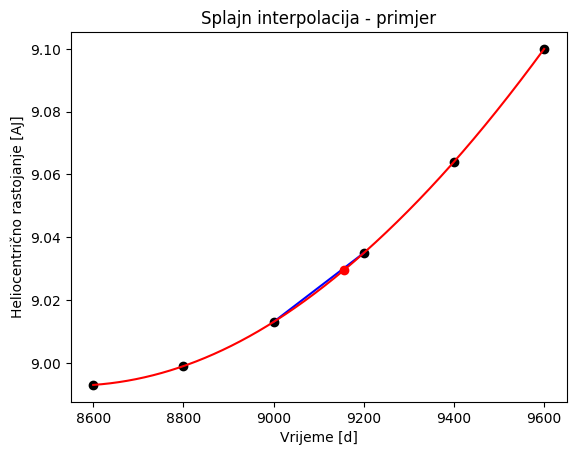

In [24]:
tt = np.linspace(t[t1-2],t[t1+3], 100000)
rr = spline_interp(t, r, tt)

r_splajn = spline_interp(t, r, [t0])

plt.plot(t[t1-2:t2+3], r[t1-2:t2+3], 'ok')
plt.plot([t[t1],t[t2]],[r[t1], r[t2]], 'b')
plt.plot(t0,r_splajn,'or')
plt.plot(tt,rr,'r')

# plt.xlim(9000, 9200)
plt.xlabel('Vrijeme [d]')
plt.ylabel('Heliocentrično rastojanje [AJ]')
plt.title('Splajn interpolacija - primjer')
plt.show()

### 1.3. Izvod funkcije korišćenjem splajn interpolacije.

vr_splajn= [208.23] m/s
 ---------------------------------------


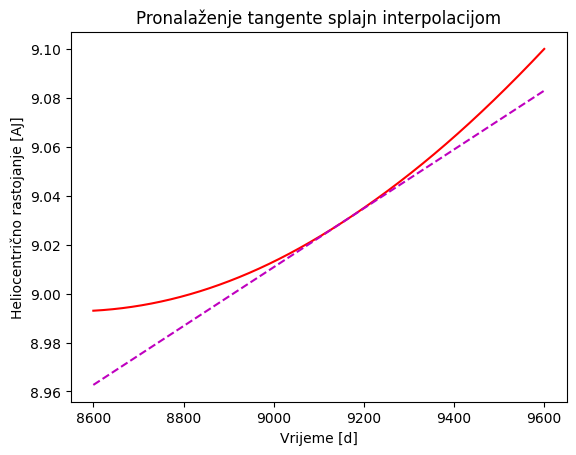

In [23]:
vr_splajn = spline_der(t,r,[t0],1)
print('vr_splajn= {} m/s\n ---------------------------------------'.format(np.round(vr_splajn*au/86400,2)))

# plotovanje tangente

plt.plot(tt,rr,'r')
# plt.plot(t[t1-2:t2+3], r[t1-2:t2+3], 'ok')
plt.plot([t[t1-2], t[t2+2]],[vr_splajn*(t[t1-2]-t0)+r_splajn, vr_splajn*(t[t2+2]-t0)+r_splajn], '--m')

plt.xlabel('Vrijeme [d]')
plt.ylabel('Heliocentrično rastojanje [AJ]')
plt.title('Pronalaženje tangente splajn interpolacijom')
plt.show()

### $\color{magenta}{\text{2. (LOKALNI) EKSTREMUMI I SPLAJN INTERPOLACIJA.}}$
Tražimo ekstreme za funkciju krive sjaja asteroida Ryugy.

In [5]:
t, m = np.loadtxt('Ryugy_light_curve.txt', delimiter=',', unpack=True)

print(len(t),len(m))

57 57


### 2.1. Pronalaženje lokalnih ekstrema splajn interpolacijom.

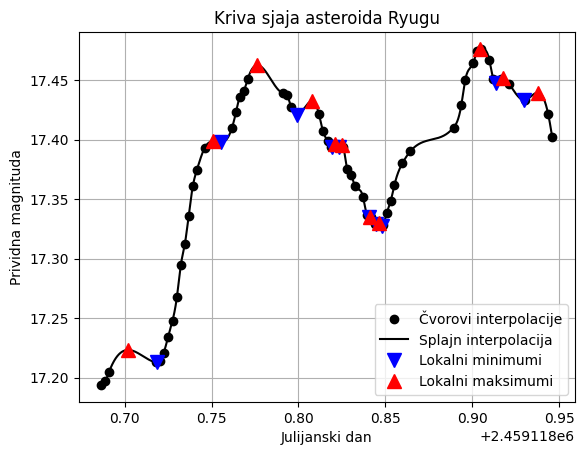

In [6]:
fig, ax = plt.subplots()
ax.plot(t, m,'ok', label ='Čvorovi interpolacije')
   
minimumi = extrema(t, m,'min')
maksimumi = extrema(t, m,'max')

tt = np.linspace(t[0], t[-1], 10000)
mm = spline_interp(t, m, tt)
ax.plot(tt, mm,'k',label ='Splajn interpolacija')

ax.plot(minimumi[0], minimumi[1], 'vb', markersize=10, label ='Lokalni minimumi')
ax.plot(maksimumi[0], maksimumi[1], '^r', markersize=10,label ='Lokalni maksimumi')

plt.xlabel('Julijanski dan')
plt.ylabel('Prividna magnituda')
plt.title('Kriva sjaja asteroida Ryugu')
ax.legend()
plt.grid()
plt.show()

### 2.2. Primjer: odrediti maksimalni i minimalni sjaj asteroida Ryugu, kao i trenutke
### u kojima do njih dolazi. Plotovati ih na grafiku krive sjaja ovog asteroida.

Maksimalni sjaj (minimalna magnituda): 17.194 u trenutku: 2459118.686655
Minimalni sjaj (maksimalna magnituda): 17.476 u trenutku: 2459118.905029


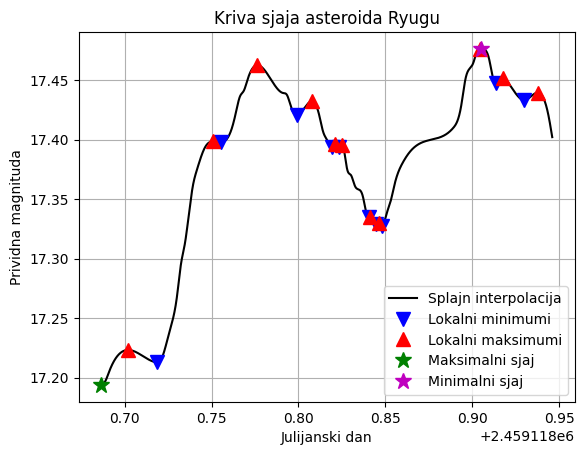

In [29]:
global_min_idx = np.argmin(m)  # indeks globalnog minimuma
global_max_idx = np.argmax(m)  # indeks globalnog maksimuma

global_min_t = t[global_min_idx] 
global_max_t = t[global_max_idx]
global_min_m = m[global_min_idx]
global_max_m = m[global_max_idx]

print(f'Maksimalni sjaj (minimalna magnituda): {global_min_m} u trenutku: {global_min_t}')
print(f'Minimalni sjaj (maksimalna magnituda): {global_max_m} u trenutku: {global_max_t}')

# plt.plot(t, m,'ok', label ='Čvorovi interpolacije')
plt.plot(tt, mm,'k',label ='Splajn interpolacija')
plt.plot(minimumi[0], minimumi[1], 'vb', markersize=10, label ='Lokalni minimumi')
plt.plot(maksimumi[0], maksimumi[1], '^r', markersize=10,label ='Lokalni maksimumi')
plt.plot(global_min_t, global_min_m, '*g', markersize=12, label='Maksimalni sjaj')
plt.plot(global_max_t, global_max_m, '*m', markersize=12, label='Minimalni sjaj')

plt.xlabel('Julijanski dan')
plt.ylabel('Prividna magnituda')
plt.title('Kriva sjaja asteroida Ryugu')
plt.legend()
plt.grid()
plt.show()

### $\color{magenta}{\text{3. NUMERIČKA INTEGRACIJA.}}$

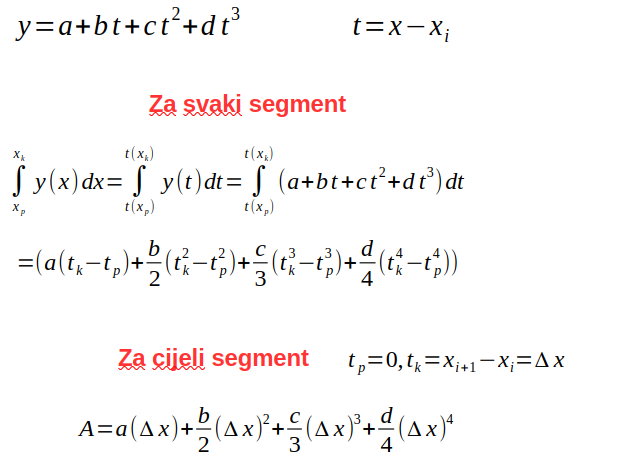

Hoćemo da odredimo ukupnu količinu zračenja koju Sunce izrači na cijelom opsjegu talasnih dužina koje su date u podacima. Dalje, treba odrediti vrijednost korišćenjem trapezne formule i pomoću interpolacije splajnom, te odrediti apsolutnu i relativnu grešku. Hoćemo da odgovorimo na pitanje koliki dio ukupnog zračenja Sunce izrači
u optičkom dijelu spektra?

2001
2001


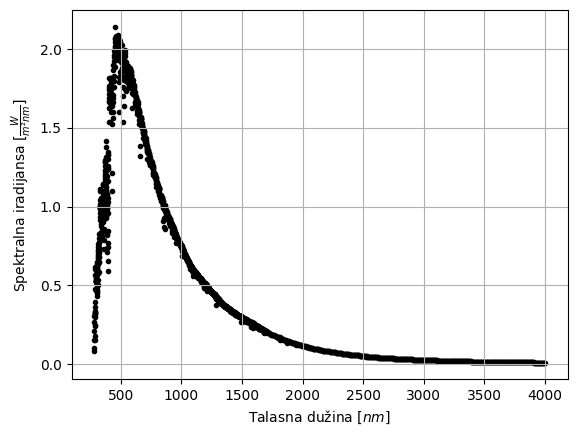

In [16]:
l, si = np.loadtxt('Spektar Sunca.txt', skiprows=2, delimiter=',', unpack=True)
print(len(l))
print(len(si))

plt.scatter(l, si, marker='.', color='black')
plt.xlabel(r'Talasna dužina $[nm]$')
plt.ylabel(r'Spektralna iradijansa $[\frac{W}{m²nm}]$')
plt.grid()
plt.show()

### 3.1. Integracija trapeznim pravilom.

In [15]:
integral_trapez=0
for i in range (len(l)-1):
    integral_trapez+=(si[i+1]+si[i])*(l[i+1]-l[i])/2

print('Ukupna iradijansa na intervalu talasnih dužina od \
{} do {} je {} W/m^2'.format(l[0],l[-1],np.round(integral_trapez,10)))

1295.1408
Ukupna iradijansa na intervalu talasnih dužina od 280.0 do 4000.0 je 1295.1408 W/m^2


### 3.2. Integracija splajnom.

In [16]:
integral_splajn = spline_integrate(l,si,l[0],l[-1])
print('Ukupna iradijansa na intervalu talasnih dužina od \
{} do {} je {} W/m^2'.format(l[0],l[-1],np.round(integral_splajn,10)))

Ukupna iradijansa na intervalu talasnih dužina od 280.0 do 4000.0 je 1300.0324901156 W/m^2


### 3.3. Relativna greška.

In [5]:
print('Relativna greška trapezne metode u odnosu \
na splajn je {} %'.format(np.round((integral_trapez-integral_splajn)/integral_splajn*100,5)))

Relativna greška trapezne metode u odnosu na splajn je 0.00021 %


### 3.4.Primjer: naći ukupnu količinu zračenja koju Sunce izrači na opsjegu talasnih dužina od $𝜆_0$
### do proizvoljne talasne dužine $𝜆$. Koliki je ukupni fluks Sunčevog zračenja na svim talasnim dužinama?

2001 2001


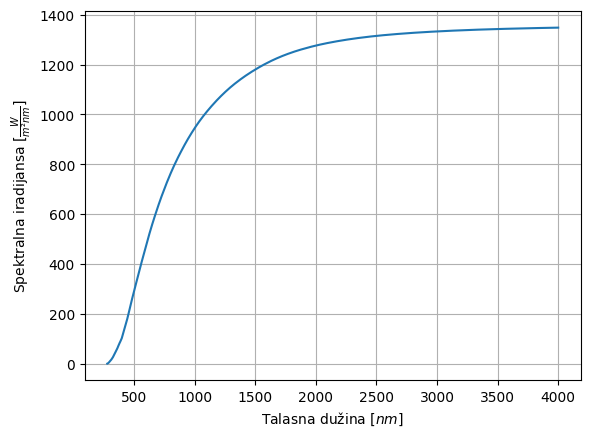

Ukupno zračenje na svim talasnim dužinama je 1347.93 W/m^2


In [16]:
plt.figure()

si_ukupno = np.zeros_like(l)

for i in range(len(l)):
    si_ukupno[i] = spline_integrate(l, si, l[0], l[i])

print(len(l), len(si_ukupno))
plt.plot(l,si_ukupno)
plt.xlabel(r'Talasna dužina $[nm]$')
plt.ylabel(r'Spektralna iradijansa $[\frac{W}{m²nm}]$')
plt.grid()
plt.show()

print('Ukupno zračenje na svim talasnim dužinama je {} W/m^2'.format(np.round(si_ukupno[-1],2)))

### $\color{red}{\text{Razmisliti o razlikama između 3.2 i 3.4. Da li spektralna iradijansa i kumulativna}}$
### $\color{red}{\text{iradijansa imaju neku primjenu? Koje su razlike? Da li primjeri i sami}}$
### $\color{red}{\text{nazivi imaju smisla?}}$

### $\color{green}{\text{ZADACI:}} $

<hr style="border: none; height: 2px; background-color: green; opacity: 0.5;" />

#### 1. Odrediti trenutke kada se Saturn nalazi u perihelu i afelu putanje. Koristiti metodu numeričkog diferenciranja.

<hr style="border: none; height: 2px; background-color: green; opacity: 0.5;" />

#### 2. Da li postoje neke razlike, u prethodnom zadatku, kad koristimo numeričko diferenciranje u odnosu na to 

#### da samo nađemo ekstreme na drugi način? Objasniti.

<hr style="border: none; height: 2px; background-color: green; opacity: 0.5;" />

### $\color{green}{\text{RJEŠENJA:}} $